In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

In [2]:
data_dir = '../data'
merged_df = pd.read_csv(os.path.join(data_dir, 'all_merged.csv'))
merged_df = merged_df.drop(['Unnamed: 0'], axis=1)
merged_df

,lon_bounds,lat_bounds,year,burned_area,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,...,tasmax_7,pr_7,tas_8,tasmax_8,pr_8,lccs_class,processed_flag,current_pixel_state,observation_count,change_count
0,-10.0,51.75,2001,0.0,0.447948,1.0,12.300000,16.500000,39.000000,13.400001,...,18.800001,79.000000,15.300000,18.9,102.1,130,1.0,1.0,89,0
1,-10.0,51.75,2002,0.0,0.447948,1.0,11.300000,14.800000,153.700000,13.000000,...,17.700000,68.700005,15.400001,18.9,56.4,130,1.0,1.0,89,0
2,-10.0,51.75,2003,0.0,0.447948,1.0,11.100000,14.500000,119.200005,14.300000,...,19.100000,87.200005,16.600000,20.5,17.2,130,1.0,1.0,89,0
3,-10.0,51.75,2004,0.0,0.447948,1.0,11.500000,15.300000,46.500000,14.400001,...,18.200000,62.900000,16.000000,19.5,109.3,130,1.0,1.0,89,0
4,-10.0,51.75,2005,0.0,0.447948,1.0,10.800000,14.300000,109.200005,14.600000,...,19.100000,71.700005,15.600000,19.2,56.9,130,1.0,1.0,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254132,50.0,51.75,2015,0.0,0.993698,1.0,17.600000,23.300001,34.400000,24.500000,...,28.000000,39.200000,20.500000,26.9,17.4,10,1.0,1.0,263,0
254133,50.0,51.75,2016,482982.0,0.993698,1.0,17.300001,23.400000,45.900000,20.400000,...,30.100000,38.400000,25.200000,32.4,17.0,10,1.0,1.0,263,0
254134,50.0,51.75,2017,8747340.0,0.993698,1.0,15.100000,20.900000,37.200000,18.700000,...,29.200000,23.700000,23.700000,30.0,6.7,10,1.0,1.0,263,0
254135,50.0,51.75,2018,9122992.0,0.993698,1.0,18.000000,24.800001,21.600000,20.000000,...,31.300001,53.400000,21.500000,28.5,8.3,10,1.0,1.0,263,0


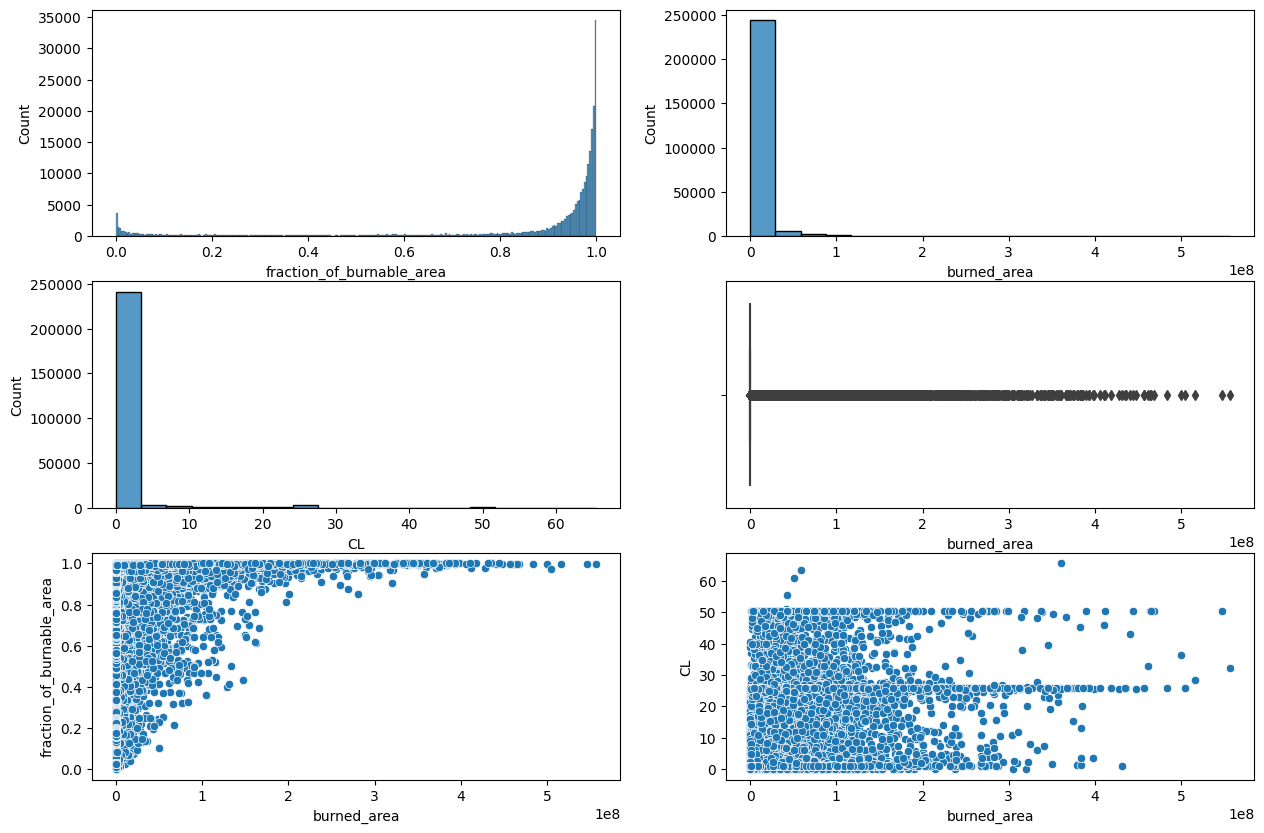

In [3]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(merged_df['fraction_of_burnable_area'], ax=ax1)
sns.histplot(merged_df['burned_area'], ax=ax2)
sns.histplot(merged_df['CL'], ax=ax3)
sns.boxplot(data = merged_df, x= 'burned_area', ax=ax4)
sns.scatterplot(data=merged_df, x='burned_area', y='fraction_of_burnable_area', ax=ax5)
sns.scatterplot(data=merged_df, x='burned_area', y='CL', ax=ax6)

plt.show();

In [4]:
merged_df = merged_df[merged_df['CL'] > 10]


In [5]:
#merged_df = merged_df.drop(merged_df[merged_df['lccs_class'] == 220].index)
#merged_df['lccs_class'].unique()

In [6]:
train, test = train_test_split(merged_df, test_size=0.05, random_state=42)

X_test = test.drop('burned_area', axis = 1)
y_test = test['burned_area']

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_test:  (445, 22)
y_test:  (445,)


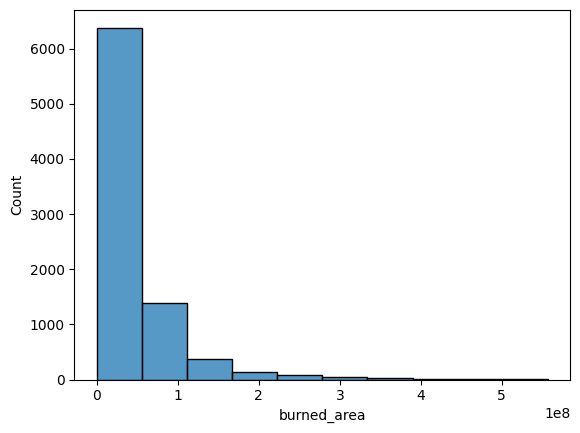

In [7]:
sns.histplot(train['burned_area'], bins = 10);

In [8]:
#zeros_to_remove = train[train['burned_area'] == 0].sample(frac=0.9999)

#train = train.drop(zeros_to_remove.index)

train = train[train['CL'] > 10]


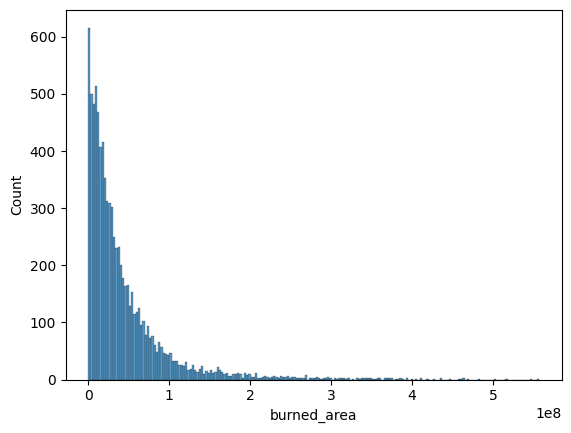

In [9]:
sns.histplot(train['burned_area'], bins = 200);

In [10]:
X_train = train.drop('burned_area', axis = 1)
y_train = train['burned_area']

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (8452, 22)
y_train:  (8452,)


In [11]:
ohe = OneHotEncoder(sparse = False) 

ohe.fit(X_train[['year']])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[['year']])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['year']])

X_train

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
201798,40.25,45.50,2015,0.989484,17.00,17.700000,23.200000,63.700000,23.000000,28.400000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
212401,42.25,45.00,2007,0.960464,25.75,16.500000,23.000000,36.900000,20.200000,26.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156647,29.75,48.00,2008,0.984494,24.75,15.100000,20.600000,43.000000,20.000000,25.800001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117662,21.25,42.50,2011,0.919977,24.50,14.600000,20.200000,65.500000,18.900000,24.600000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218437,43.25,49.25,2002,0.968320,21.75,14.400001,20.400000,23.300001,19.500000,25.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201884,40.25,46.75,2006,0.981820,20.00,16.800001,22.400000,51.100002,22.600000,28.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196696,39.25,46.75,2005,0.996853,19.50,18.900000,24.500000,44.900000,20.800001,25.800001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198313,39.50,51.25,2007,0.985983,19.50,17.600000,24.000000,30.300001,19.400000,25.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133019,24.50,44.50,2016,0.869268,25.00,17.200000,23.300001,74.500000,23.000000,29.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


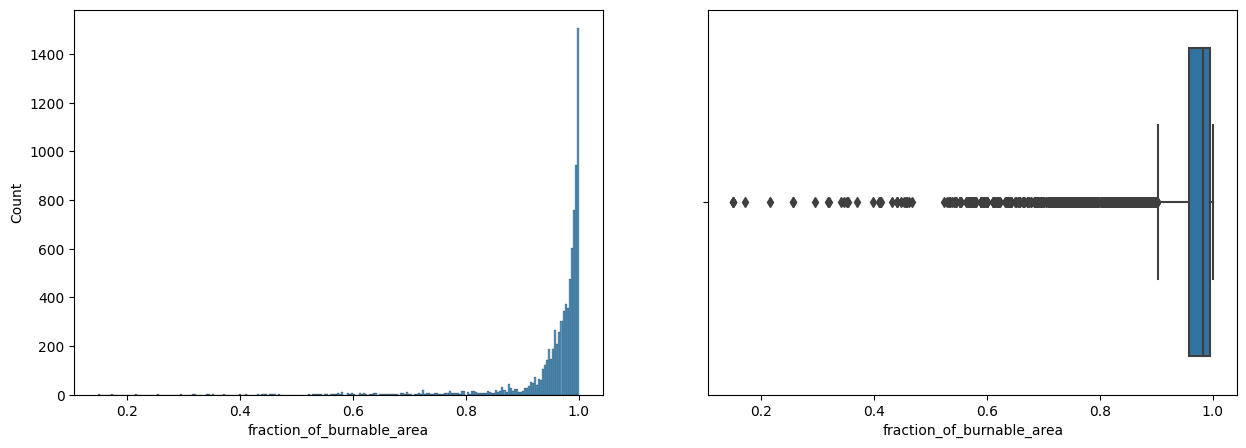

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

In [13]:
rb_scaler = RobustScaler()

rb_scaler.fit(X_train[['fraction_of_burnable_area']])
X_train[['fraction_of_burnable_area']] = rb_scaler.transform(X_train[['fraction_of_burnable_area']])
X_test[['fraction_of_burnable_area']] = rb_scaler.transform(X_test[['fraction_of_burnable_area']])

X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
201798,40.25,45.50,2015,0.190209,17.00,17.700000,23.2,63.700000,23.0,28.400000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
212401,42.25,45.00,2007,-0.598358,25.75,16.500000,23.0,36.900000,20.2,26.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156647,29.75,48.00,2008,0.054604,24.75,15.100000,20.6,43.000000,20.0,25.800001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117662,21.25,42.50,2011,-1.698520,24.50,14.600000,20.2,65.500000,18.9,24.600000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218437,43.25,49.25,2002,-0.384890,21.75,14.400001,20.4,23.300001,19.5,25.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


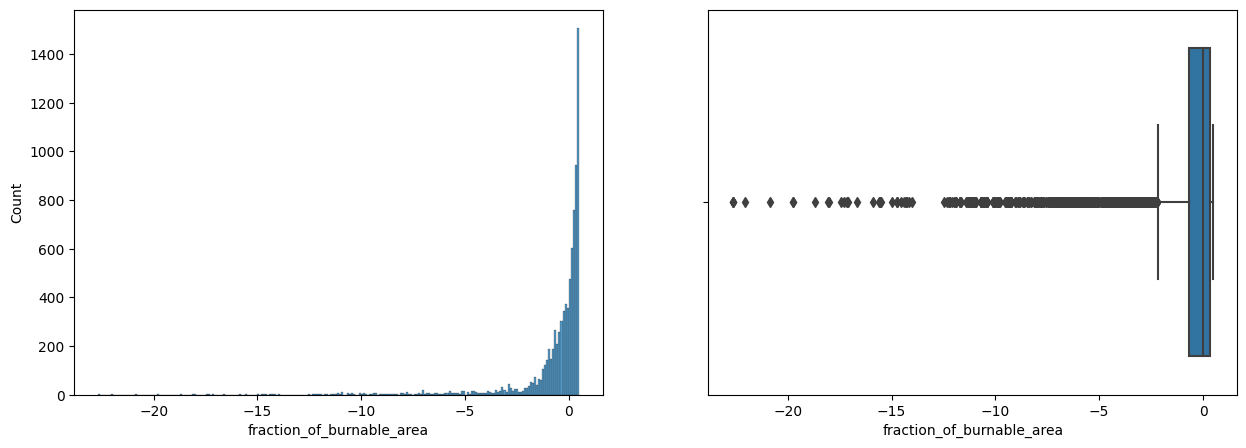

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

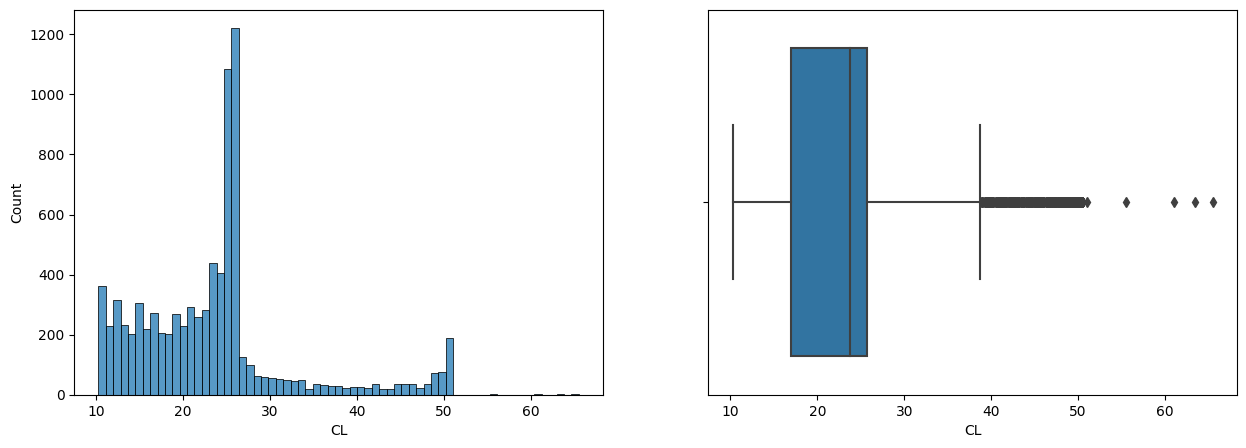

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['CL'], ax= ax1)
sns.boxplot(data = X_train, x= 'CL', ax=ax2);

In [16]:
mm_scaler = MinMaxScaler()

rb_scaler.fit(X_train[['CL']])
X_train[['CL']] = rb_scaler.transform(X_train[['CL']])
X_test[['CL']] = rb_scaler.transform(X_test[['CL']])
X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
201798,40.25,45.50,2015,0.190209,-0.771429,17.700000,23.2,63.700000,23.0,28.400000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
212401,42.25,45.00,2007,-0.598358,0.228571,16.500000,23.0,36.900000,20.2,26.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156647,29.75,48.00,2008,0.054604,0.114286,15.100000,20.6,43.000000,20.0,25.800001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117662,21.25,42.50,2011,-1.698520,0.085714,14.600000,20.2,65.500000,18.9,24.600000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218437,43.25,49.25,2002,-0.384890,-0.228571,14.400001,20.4,23.300001,19.5,25.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


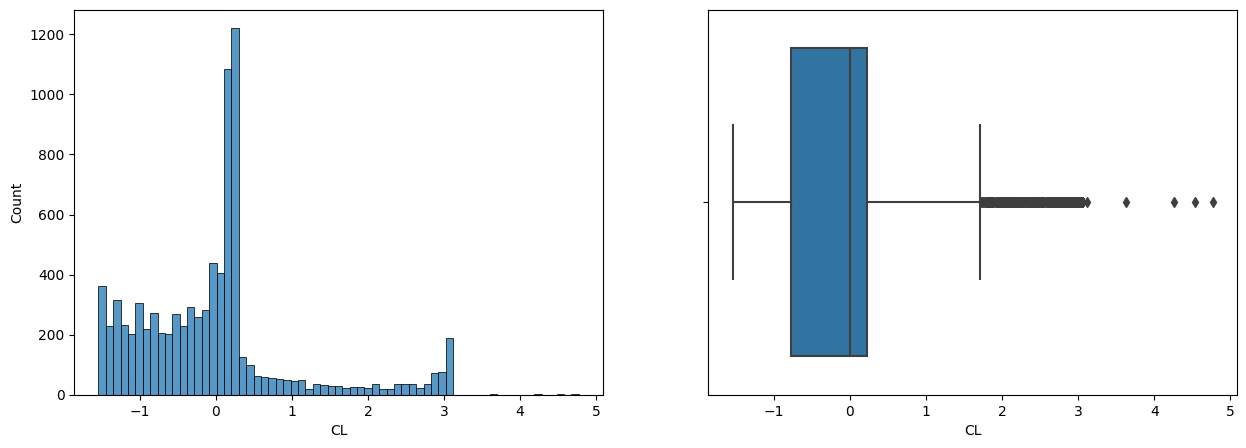

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['CL'], ax= ax1)
sns.boxplot(data = X_train, x= 'CL', ax=ax2);

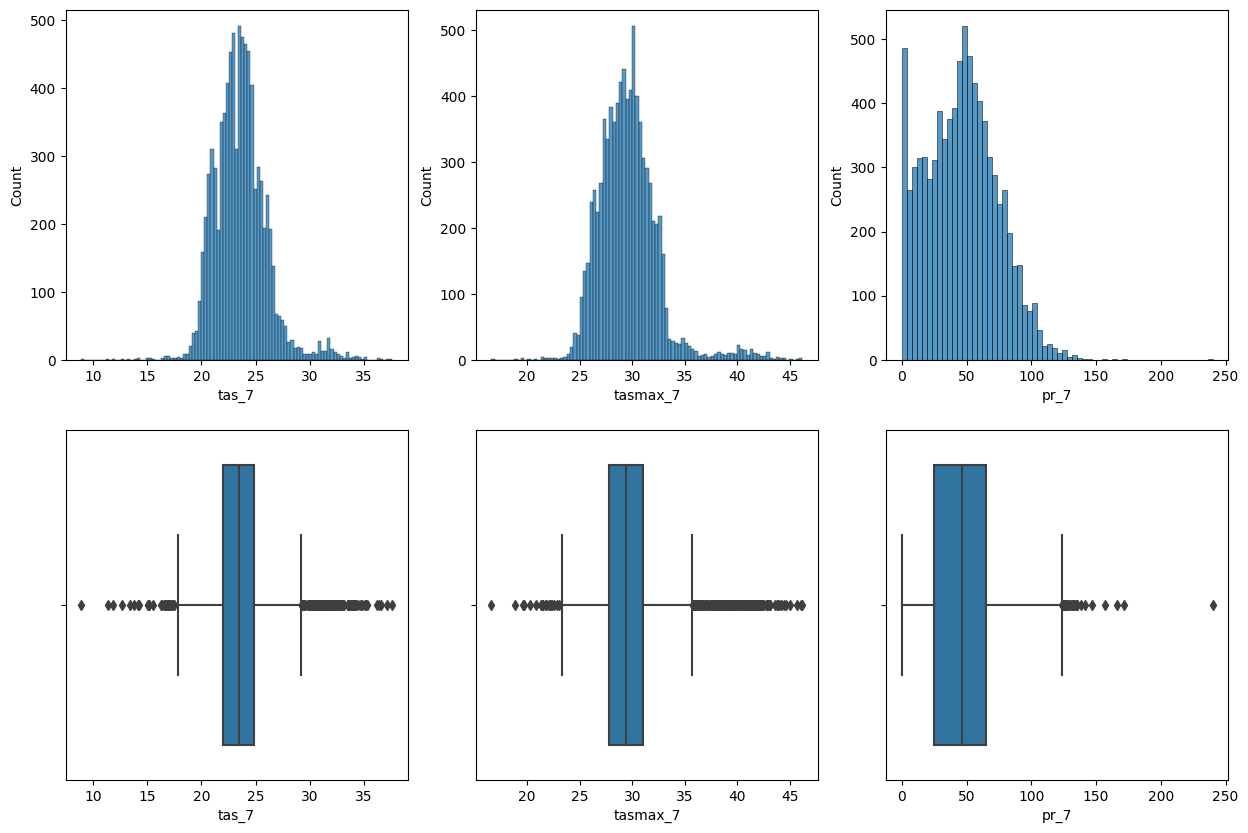

In [18]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(X_train['tas_7'], ax= ax1)
sns.histplot(X_train['tasmax_7'], ax= ax2)
sns.histplot(X_train['pr_7'], ax= ax3)

sns.boxplot(data = X_train, x= 'tas_7', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax_7', ax=ax5)
sns.boxplot(data = X_train, x= 'pr_7', ax=ax6);

In [19]:
rb_scaler = RobustScaler()

for i in range(5,9):
    tas = f'tas_{i}'
    tasmax = f'tasmax_{i}'
    pr = f'pr_{i}'
    rb_scaler.fit(X_train[[tas, tasmax, pr]])
    X_train[[tas, tasmax, pr]] = rb_scaler.transform(X_train[[tas, tasmax, pr]])
    X_test[[tas, tasmax, pr]] = rb_scaler.transform(X_test[[tas, tasmax, pr]])

X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
201798,40.25,45.50,2015,0.190209,-0.771429,0.407407,0.290322,0.421829,0.733333,0.558824,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
212401,42.25,45.00,2007,-0.598358,0.228571,-0.037037,0.225806,-0.368732,-0.200000,0.029412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156647,29.75,48.00,2008,0.054604,0.114286,-0.555556,-0.548388,-0.188791,-0.266667,-0.205882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117662,21.25,42.50,2011,-1.698520,0.085714,-0.740741,-0.677420,0.474926,-0.633334,-0.558824,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218437,43.25,49.25,2002,-0.384890,-0.228571,-0.814814,-0.612904,-0.769911,-0.433334,-0.323530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


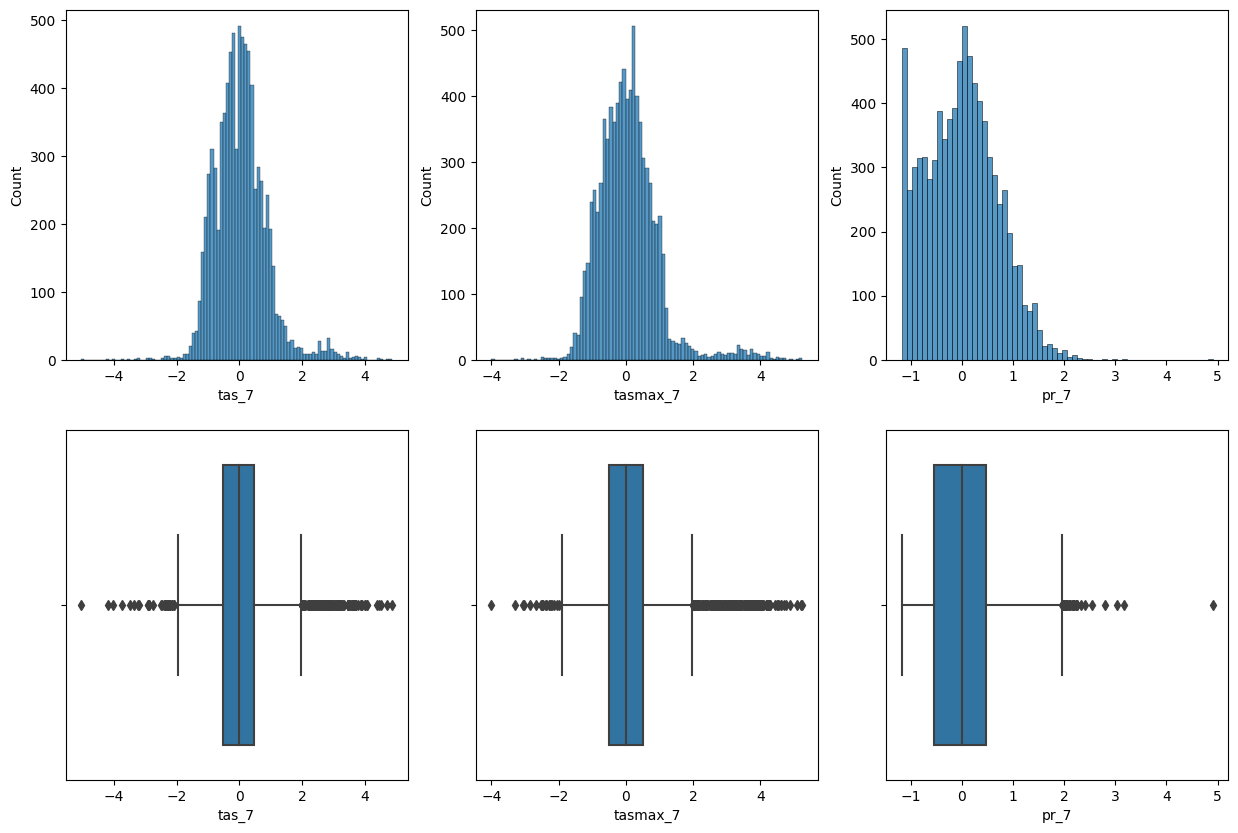

In [20]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(X_train['tas_7'], ax= ax1)
sns.histplot(X_train['tasmax_7'], ax= ax2)
sns.histplot(X_train['pr_7'], ax= ax3)

sns.boxplot(data = X_train, x= 'tas_7', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax_7', ax=ax5)
sns.boxplot(data = X_train, x= 'pr_7', ax=ax6);

In [21]:
ohe = OneHotEncoder(sparse = False) 

ohe.fit(X_train[['lccs_class']])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[['lccs_class']])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['lccs_class']])

X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,lccs_class_70,lccs_class_90,lccs_class_100,lccs_class_110,lccs_class_120,lccs_class_130,lccs_class_150,lccs_class_153,lccs_class_160,lccs_class_180
201798,40.25,45.50,2015,0.190209,-0.771429,0.407407,0.290322,0.421829,0.733333,0.558824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212401,42.25,45.00,2007,-0.598358,0.228571,-0.037037,0.225806,-0.368732,-0.200000,0.029412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156647,29.75,48.00,2008,0.054604,0.114286,-0.555556,-0.548388,-0.188791,-0.266667,-0.205882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117662,21.25,42.50,2011,-1.698520,0.085714,-0.740741,-0.677420,0.474926,-0.633334,-0.558824,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
218437,43.25,49.25,2002,-0.384890,-0.228571,-0.814814,-0.612904,-0.769911,-0.433334,-0.323530,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
#X_train['x'] = np.cos(X_train['lat_bounds']) * np.cos(X_train['lon_bounds'])
#X_train['y'] = np.cos(X_train['lat_bounds']) * np.sin(X_train['lon_bounds'])
#X_train = X_train.drop(['lat_bounds', 'lon_bounds'], axis =1).reset_index(drop = True)

X_train = X_train.drop(['lat_bounds', 'lon_bounds'], axis=1)

In [23]:
#X_test['x'] = np.cos(X_test['lat_bounds']) * np.cos(X_test['lon_bounds'])
#X_test['y'] = np.cos(X_test['lat_bounds']) * np.sin(X_test['lon_bounds'])
#X_test = X_test.drop(['lat_bounds', 'lon_bounds'], axis =1).reset_index(drop = True)


X_test = X_test.drop(['lat_bounds', 'lon_bounds'], axis =1)

In [24]:
X_train = X_train.drop(
    [ 'processed_flag',
     'current_pixel_state',
     'observation_count',
     'change_count',
     'lccs_class',
     'year'],
    axis=1
    )

X_test = X_test.drop(
    [ 'processed_flag',
     'current_pixel_state',
     'observation_count',
     'change_count',
     'lccs_class',
     'year'],
    axis=1
    )



ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
ln_model.score(X_test, y_test)

from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X_train, y=y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

model = RandomForestRegressor()
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();



subset_indices = np.random.choice(X_train.shape[0], size=X_train.shape[0] // 2, replace=False)
X_subset = X_train.iloc[subset_indices]
y_subset = y_train.iloc[subset_indices]

model = RandomForestRegressor()

param_grid = {
    'min_samples_leaf': [2],
    'max_depth': [30, 40],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid)

grid_search.fit(X_subset, y_subset)

print(grid_search.best_params_)


<AxesSubplot:xlabel='burned_area', ylabel='Count'>

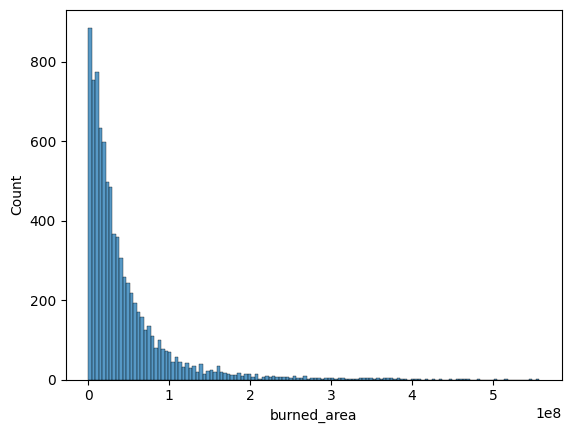

In [34]:
sns.histplot(y_train);

In [35]:
from scipy import stats

# assuming y_train is your target variable as a pandas Series
y_train_transformed, lambda_ = stats.boxcox(y_train + 1)

# you can also create a new pandas Series with the transformed data
y_train_transformed = pd.Series(y_train_transformed)


In [38]:
# assuming y_train is your target variable as a pandas Series
y_train_transformed = np.log1p(y_train)

# you can also create a new pandas Series with the transformed data
y_train_transformed = pd.Series(y_train_transformed)


In [47]:
from sklearn.model_selection import GridSearchCV

subset_indices = np.random.choice(X_train.shape[0], size=X_train.shape[0] // 2, replace=False)
X_subset = X_train.iloc[subset_indices]
y_subset = y_train_transformed.iloc[subset_indices]

model = RandomForestRegressor()

param_grid = {
    'min_samples_leaf': [2, 5, 8],
    'max_depth': [20, 30, 40],
    'max_features': ['sqrt'],
    'n_estimators': [200, 400, 600],
    'min_samples_split': [2, 4, 6, 10]
}

grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_subset, y_subset)


print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600}
0.21332303210039302


In [48]:
from sklearn.feature_selection import SelectFromModel
'''
model = RandomForestRegressor(
    min_samples_leaf=2,
    max_depth=30,
    max_features = 'sqrt',
    n_estimators = 600,
    min_samples_split = 2    
)

model.fit(X_train, y_train_transformed)
'''

selector = SelectFromModel(model, threshold= 3 * np.mean(model.feature_importances_))

selector.fit(X_train, y_train_transformed)

X_selected = selector.transform(X_train)

selected_features = X_train.columns[selector.get_support()]
selected_features


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

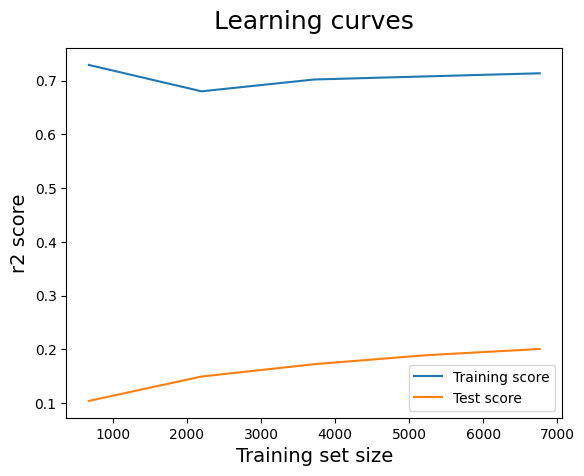

In [45]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train[selected_features], y=y_train_transformed, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [46]:
# next step balance the dataset